In [1]:
import math
import tensorflow as tf
import numpy as np
import pylab as plt

/Users/lzcai/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# scale data
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

In [21]:
# Initialize Values
NUM_FEATURES = 36
NUM_CLASSES = 6
NUM_HIDDEN = 10

LEARNING_RATE = 0.01
EPOCHS = 5000
BATCH_SIZE = 32
NUM_NEURONS = 10
SEED = 10
BETA = pow(10, -6)
np.random.seed(SEED)

TRAIN_FILE_NAME = 'sat_train.txt'
TEST_FILE_NAME = 'sat_test.txt'

In [5]:
def process_inputs_from_file(fileName): # Read in data
    inputs = np.loadtxt(fileName, delimiter=' ')
    X, _Y = inputs[:, :NUM_FEATURES], inputs[:, -1].astype(int)
    X = scale(X, np.min(X, axis=0), np.max(X, axis=0))
    _Y[_Y == 7] = 6 # Actually dont have, just in case have error data

    Y = np.zeros((_Y.shape[0], NUM_CLASSES))
    Y[np.arange(_Y.shape[0]), _Y - 1] = 1 #one hot matrix
    return X, Y

In [7]:
trainX, trainY = process_inputs_from_file(TRAIN_FILE_NAME)
testX, textY = process_inputs_from_file(TEST_FILE_NAME)

In [8]:
def init_weights (feature_no, neuron_no, logistic = True):
    # From eg.5.2
    n_in = feature_no
    n_out = neuron_no
    W_values = np.asarray(np.random.uniform(low=-np.sqrt(6. / (n_in + n_out)),
                                            high=np.sqrt(6. / (n_in + n_out)),
                                            size=(n_in, n_out)))
    if logistic == True:
        W_values *= 4
    return(tf.Variable(W_values, dtype=tf.float32))

In [9]:
def init_bias(neuron_no = 1):
    # From eg.5.2
    return(tf.Variable(np.zeros(neuron_no), dtype=tf.float32))

In [10]:
V = init_weights(NUM_HIDDEN, NUM_CLASSES)
c = init_bias(NUM_CLASSES)
W = init_weights(NUM_FEATURES, NUM_HIDDEN)
b = init_bias(NUM_HIDDEN)

In [11]:
x = tf.placeholder(tf.float32, trainX.shape)
d = tf.placeholder(tf.float32, trainY.shape)

z = tf.matmul(x, W) + b
h = tf.nn.sigmoid(z)
y = tf.matmul(h, V) + c

In [13]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(
    labels=trainY, logits=y)
regularization = tf.nn.l2_loss(V) + tf.nn.l2_loss(W) 
J = tf.reduce_mean(cross_entropy + BETA * regularization)

In [15]:
optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE)
train_op = optimizer.minimize(J)
correct_prediction = tf.cast(tf.equal(tf.argmax(y, 1), 
                                      tf.argmax(trainY, 1)), tf.float32)
accuracy = tf.reduce_mean(correct_prediction)

In [22]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    train_acc = []
    for i in range(EPOCHS):
        train_op.run(feed_dict={x: trainX, d: trainY})
        train_acc.append(accuracy.eval(feed_dict={x: trainX, d: trainY}))

        if i % 100 == 0:
            print('iter %d: accuracy %g'%(i, train_acc[i]))

iter 0: accuracy 0.111387
iter 100: accuracy 0.297632
iter 200: accuracy 0.315445
iter 300: accuracy 0.338895
iter 400: accuracy 0.363021
iter 500: accuracy 0.384893
iter 600: accuracy 0.404735
iter 700: accuracy 0.42345
iter 800: accuracy 0.446449
iter 900: accuracy 0.462458
iter 1000: accuracy 0.485457
iter 1100: accuracy 0.515896
iter 1200: accuracy 0.549493
iter 1300: accuracy 0.585569
iter 1400: accuracy 0.61894
iter 1500: accuracy 0.643743
iter 1600: accuracy 0.661781
iter 1700: accuracy 0.673732
iter 1800: accuracy 0.684104
iter 1900: accuracy 0.690417
iter 2000: accuracy 0.697632
iter 2100: accuracy 0.704622
iter 2200: accuracy 0.711612
iter 2300: accuracy 0.716573
iter 2400: accuracy 0.721082
iter 2500: accuracy 0.722886
iter 2600: accuracy 0.726268
iter 2700: accuracy 0.728298
iter 2800: accuracy 0.730101
iter 2900: accuracy 0.733033
iter 3000: accuracy 0.735738
iter 3100: accuracy 0.737317
iter 3200: accuracy 0.738219
iter 3300: accuracy 0.740023
iter 3400: accuracy 0.742728

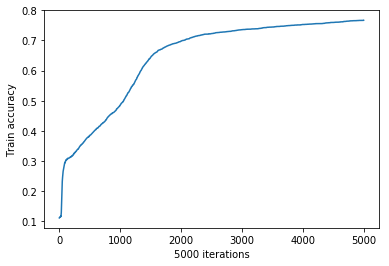

In [23]:
# plot learning curves
plt.figure(1)
plt.plot(range(EPOCHS), train_acc)
plt.xlabel(str(EPOCHS) + ' iterations')
plt.ylabel('Train accuracy')
plt.show()